<a href="https://colab.research.google.com/github/parksuejin1026/2025-ANN/blob/main/13Weeks/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd # 데이터 처리를 위한 pandas 라이브러리 임포트

from tensorflow.keras.models import Sequential # 딥러닝 모델을 순차적으로 구성하기 위한 Sequential 모델 임포트
from tensorflow.keras.layers import Dense # 신경망의 Dense(완전 연결) 레이어 임포트
from sklearn.model_selection import train_test_split # 데이터셋을 훈련 세트와 테스트 세트로 분할하기 위한 함수 임포트

!git clone https://github.com/taehojo/data.git # GitHub에서 데이터 저장소를 클론(다운로드)

df = pd.read_csv('./data/wine.csv', header=None) # './data/wine.csv' 파일을 읽어와 데이터프레임(df)으로 로드 (헤더 없음)

X = df.iloc[:,0:12] # 데이터프레임의 첫 12개 열을 특성(features) X로 지정 (입력 데이터)
y = df.iloc[:,12] # 데이터프레임의 마지막 열을 타겟(target) y로 지정 (정답 데이터)

# X와 y 데이터를 훈련 세트와 테스트 세트로 8:2 비율로 분할 (테스트 사이즈 20%), 데이터 섞기 (shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential() # Sequential 모델 생성 (레이어를 순서대로 쌓는 방식)
# 첫 번째 Dense 레이어: 30개 뉴런, 입력 특성 12개, 활성화 함수 'relu' (음수 값을 0으로 만드는 비선형 함수)
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation = 'relu')) # 두 번째 Dense 레이어: 12개 뉴런, 활성화 함수 'relu'
model.add(Dense(8, activation = 'relu')) # 세 번째 Dense 레이어: 8개 뉴런, 활성화 함수 'relu'
model.add(Dense(1, activation = 'sigmoid')) # 출력 Dense 레이어: 1개 뉴런 (이진 분류), 활성화 함수 'sigmoid' (확률 값으로 변환)
model.summary() # 모델의 구조 요약 출력 (레이어, 출력 형태, 파라미터 수)

# 모델 컴파일: 손실 함수, 옵티마이저, 평가 지표 설정
# loss='binary_crossentropy': 이진 분류에 적합한 손실 함수
# optimizer='adam': 학습 속도를 조절하는 최적화 알고리즘
# metrics=['accuracy']: 모델 성능 평가 지표로 정확도 사용
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# 모델 훈련: 훈련 데이터(X_train, y_train)로 50 에포크 동안 훈련, 배치 크기 500, 검증 데이터 25% 사용
# epochs: 전체 훈련 데이터를 몇 번 반복 학습할지 지정
# batch_size: 한 번에 처리할 샘플 수
# validation_split: 훈련 데이터 중 검증에 사용할 비율
history = model.fit(X_train, y_train, epochs=50, batch_size = 500, validation_split=0.25)

# 테스트 세트(X_test, y_test)로 모델 평가
score = model.evaluate(X_test, y_test)
print("Test accuracy : ", score[1] ) # 평가 결과 중 정확도(accuracy) 출력

fatal: destination path 'data' already exists and is not an empty directory.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6535 - loss: 1.5255 - val_accuracy: 0.8754 - val_loss: 0.6336
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8675 - loss: 0.5514 - val_accuracy: 0.8269 - val_loss: 0.7904
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8576 - loss: 0.5912 - val_accuracy: 0.8808 - val_loss: 0.5989
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8974 - loss: 0.4438 - val_accuracy: 0.8869 - val_loss: 0.4720
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8892 - loss: 0.3739 - val_accuracy: 0.8777 - val_loss: 0.4307
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8933 - loss: 0.3384 - val_accuracy: 0.9115 - val_loss: 0.3643
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9181 - loss: 0.2881 - val_accuracy: 0.9208 - val_loss: 0.3010
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9286 - loss: 0.2264 - val_accuracy: 0.9223 - val_loss: 0.2498


In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint # 모델 훈련 중 특정 조건에 따라 모델을 저장하는 콜백 함수 임포트

# 모델 저장 경로 설정: 각 에포크마다 파일명에 에포크 번호와 검증 정확도 포함, 확장자는 .keras
modelpath = "./data/model/{epoch:02d}-{val_accuracy:.4f}.keras"
# ModelCheckpoint 콜백 생성: 지정된 경로에 모델 저장, 저장 시 메시지 출력(verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 훈련 (50 에포크):
# X_train, y_train: 훈련 데이터
# epochs=50: 총 50번의 에포크 동안 훈련
# batch_size=500: 500개의 샘플씩 묶어서 학습
# validation_split=0.25: 훈련 데이터의 25%를 검증 데이터로 사용
# verbose=0: 훈련 과정 출력 생략 (콜백이 저장 메시지를 출력하므로)
# callbacks=[checkpointer]: ModelCheckpoint 콜백 적용
history = model.fit(X_train, y_train, epochs=50, batch_size = 500, validation_split = 0.25, verbose = 0, callbacks = [checkpointer])

# 테스트 세트(X_test, y_test)로 모델 평가
score = model.evaluate(X_test, y_test)
print("Test Accuracy : ", score[1]) # 평가 결과 중 정확도(accuracy) 출력


Epoch 1: saving model to ./data/model/01-0.9500.keras

Epoch 2: saving model to ./data/model/02-0.9531.keras

Epoch 3: saving model to ./data/model/03-0.9569.keras

Epoch 4: saving model to ./data/model/04-0.9523.keras

Epoch 5: saving model to ./data/model/05-0.9538.keras

Epoch 6: saving model to ./data/model/06-0.9554.keras

Epoch 7: saving model to ./data/model/07-0.9546.keras

Epoch 8: saving model to ./data/model/08-0.9569.keras

Epoch 9: saving model to ./data/model/09-0.9569.keras

Epoch 10: saving model to ./data/model/10-0.9569.keras

Epoch 11: saving model to ./data/model/11-0.9569.keras

Epoch 12: saving model to ./data/model/12-0.9562.keras

Epoch 13: saving model to ./data/model/13-0.9615.keras

Epoch 14: saving model to ./data/model/14-0.9662.keras

Epoch 15: saving model to ./data/model/15-0.9623.keras

Epoch 16: saving model to ./data/model/16-0.9569.keras

Epoch 17: saving model to ./data/model/17-0.9654.keras

Epoch 18: saving model to ./data/model/18-0.9623.keras



In [ ]:
# 모델 훈련 (2000 에포크):
# 이전 훈련에 이어서 추가 훈련 진행
# X_train, y_train: 훈련 데이터
# epochs=2000: 총 2000번의 에포크 동안 훈련
# batch_size=500: 500개의 샘플씩 묶어서 학습
# validation_split=0.25: 훈련 데이터의 25%를 검증 데이터로 사용
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25)

# 훈련 이력(history) 데이터를 데이터프레임으로 변환
# history.history: 에포크별 훈련 손실, 정확도, 검증 손실, 검증 정확도 등의 기록
hist_df = pd.DataFrame(history.history)
hist_df # 데이터프레임 출력

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9777 - loss: 0.0707 - val_accuracy: 0.9715 - val_loss: 0.1035
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9725 - loss: 0.0737 - val_accuracy: 0.9723 - val_loss: 0.1004
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9763 - loss: 0.0695 - val_accuracy: 0.9738 - val_loss: 0.0999
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9804 - loss: 0.0684 - val_accuracy: 0.9715 - val_loss: 0.1017
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9756 - loss: 0.0789 - val_accuracy: 0.9746 - val_loss: 0.0992
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9774 - loss: 0.0668 - val_accuracy: 0.9738 - val_loss: 0.0991
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9739 - loss: 0.0765 - val_accuracy: 0.9723 - val_loss: 0.1006
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9765 - loss: 0.0732 - val_accuracy: 0.9708 - v

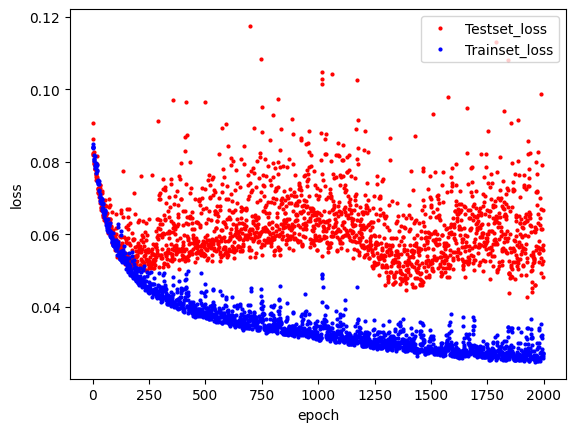

In [16]:
import numpy as np
import matplotlib.pyplot as plt # 그래프를 그리기 위한 matplotlib 라이브러리 임포트

y_vloss = hist_df['val_loss'] # hist_df에서 검증 세트의 손실(validation loss) 값을 가져옴
y = hist_df['loss'] # hist_df에서 훈련 세트의 손실(training loss) 값을 가져옴

# 에포크 수를 x축 값으로 사용하기 위해 0부터 에포크 수-1까지의 배열 생성
x_len = np.arange(len(y))

# 테스트 세트 손실을 빨간색 원으로 플롯 (마커 크기 2, 레이블 'Testset_loss')
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 2, label = "Testset_loss")
# 훈련 세트 손실을 파란색 원으로 플롯 (마커 크기 2, 레이블 'Trainset_loss')
plt.plot(x_len, y, "o", c = "blue", markersize = 2, label = 'Trainset_loss')

plt.legend(loc = "upper right") # 범례(label)를 그래프의 오른쪽 상단에 표시
plt.xlabel('epoch') # x축 레이블을 'epoch'으로 설정
plt.ylabel('loss') # y축 레이블을 'loss'로 설정
plt.show() # 그래프 출력

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # ModelCheckpoint와 EarlyStopping 콜백 함수 임포트

# EarlyStopping 콜백 설정:
# monitor='val_loss': 검증 손실을 모니터링
# patience=20: val_loss가 20 에포크 동안 개선되지 않으면 훈련 중지
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20)
# 모델 저장 경로 설정: 가장 좋은 모델만 저장될 경로
modelpath = "./data/model/Ch14-4-bestmodel.keras"

# ModelCheckpoint 콜백 설정:
# filepath: 모델 저장 경로
# monitor='val_loss': 검증 손실을 모니터링하여 모델 저장 여부 결정
# verbose=1: 모델 저장 시 메시지 출력
# save_best_only=True: val_loss가 가장 낮은(최적) 모델만 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

# 모델 훈련 (2000 에포크):
# X_train, y_train: 훈련 데이터
# validation_split=0.25: 훈련 데이터의 25%를 검증 데이터로 사용
# epochs=2000: 최대 2000번의 에포크 동안 훈련 (EarlyStopping에 의해 조기 종료 가능)
# batch_size=500: 500개의 샘플씩 묶어서 학습
# callbacks=[early_stopping, checkpointer]: EarlyStopping과 ModelCheckpoint 콜백 적용
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 2000, batch_size = 500, callbacks=[early_stopping, checkpointer])

Epoch 1/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9940 - loss: 0.0275
Epoch 1: val_loss improved from inf to 0.06545, saving model to ./data/model/Ch14-4-bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9910 - loss: 0.0270 - val_accuracy: 0.9854 - val_loss: 0.0654
Epoch 2/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9920 - loss: 0.0212
Epoch 2: val_loss did not improve from 0.06545
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9909 - loss: 0.0309 - val_accuracy: 0.9854 - val_loss: 0.0798
Epoch 3/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9960 - loss: 0.0246
Epoch 3: val_loss did not improve from 0.06545
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9808 - val_loss: 0.0686
Epoch 4/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9940 - loss: 0.0249
Epoch 4: val_loss improved from 0.06545 to 0.05298, saving model to ./data/model/Ch14-4-bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━